In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier, BaggingClassifier, VotingClassifier

In [24]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Test.csv')
sample = pd.read_excel(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Sample_Submission.xlsx')

In [25]:
train.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [26]:
test.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,0,1,1,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0
2,1,1,1,0,1,0,0,0,1,0,0,0
3,2,0,0,0,1,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,1,1,0,0,0


In [27]:
train.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
test.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,1.295812,0.120419,0.793194,0.054974,0.892670,0.052356,0.060209,0.107330,0.924084,0.005236,0.020942,0.031414
std,0.511221,0.325878,0.405547,0.228228,0.309938,0.223036,0.238186,0.309938,0.265211,0.072262,0.143379,0.174662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
train.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [30]:
test.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
dtype: int64

In [31]:
for c in train.columns :
    print(train[c].value_counts())

1    607
2    256
0     26
Name: Gender, dtype: int64
0    782
1    107
Name: Chain_smoker, dtype: int64
1    745
0    144
Name: Consumes_other_tobacco_products, dtype: int64
0    812
1     77
Name: HighBP, dtype: int64
1    817
0     72
Name: Obese, dtype: int64
0    840
1     49
Name: Diabetes, dtype: int64
0    851
1     38
Name: Metabolic_syndrome, dtype: int64
0    816
1     73
Name: Use_of_stimulant_drugs, dtype: int64
1    823
0     66
Name: Family_history, dtype: int64
0    873
1     16
Name: History_of_preeclampsia, dtype: int64
0    870
1     19
Name: CABG_history, dtype: int64
0    860
1     29
Name: Respiratory_illness, dtype: int64
no     699
yes    190
Name: UnderRisk, dtype: int64


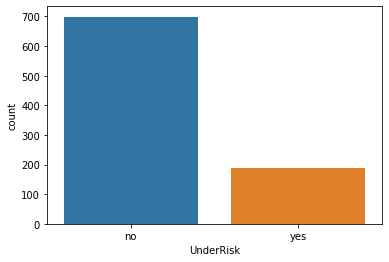

In [32]:
sns.countplot(train.UnderRisk)

# ANALYSIS

In [33]:
train.head(1)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no


In [34]:
for i,c in enumerate(train.columns[:-1]):
    print(train.groupby([c,train.columns[i+1]])['UnderRisk'].value_counts(),'\n\n')

Gender  Chain_smoker  UnderRisk
0       0             no            21
                      yes            4
        1             no             1
1       0             no           376
                      yes          141
        1             no            85
                      yes            5
2       0             no           201
                      yes           39
        1             no            15
                      yes            1
Name: UnderRisk, dtype: int64 


Chain_smoker  Consumes_other_tobacco_products  UnderRisk
0             0                                no            91
                                               yes           21
              1                                no           507
                                               yes          163
1             0                                no            31
                                               yes            1
              1                                no            70
 

In [35]:
ind_no = []
train = train.groupby('Family_history').get_group(1).reset_index(drop = True)
d = test[test.Family_history==0].index
ind_no.extend(d)
del train['Family_history']
del test['Family_history']
test.drop(index = d, inplace = True)

In [36]:
len(ind_no)

29

In [37]:
train = train.groupby('CABG_history').get_group(0).reset_index(drop = True)
d = test[test.CABG_history==1].index.tolist()
del train['CABG_history']
del test['CABG_history']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

37

In [38]:
train = train.groupby('History_of_preeclampsia').get_group(0).reset_index(drop = True)
d = test[test.History_of_preeclampsia==1].index.tolist()
del train['History_of_preeclampsia']
del test['History_of_preeclampsia']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

39

In [39]:
for c in train.columns[:-1]:
    print(train.groupby(c)['UnderRisk'].value_counts(),'\n\n')

Gender  UnderRisk
0       no            17
        yes            4
1       no           383
        yes          146
2       no           199
        yes           40
Name: UnderRisk, dtype: int64 


Chain_smoker  UnderRisk
0             no           515
              yes          184
1             no            84
              yes            6
Name: UnderRisk, dtype: int64 


Consumes_other_tobacco_products  UnderRisk
0                                no            69
                                 yes           22
1                                no           530
                                 yes          168
Name: UnderRisk, dtype: int64 


HighBP  UnderRisk
0       no           555
        yes          160
1       no            44
        yes           30
Name: UnderRisk, dtype: int64 


Obese  UnderRisk
0      no            24
       yes           13
1      no           575
       yes          177
Name: UnderRisk, dtype: int64 


Diabetes  UnderRisk
0         no           57

In [40]:
84/90

0.9333333333333333

In [41]:
chain = []
train = train.groupby('Chain_smoker').get_group(0).reset_index(drop = True)
d = test[test.Chain_smoker==1].index.tolist()
del train['Chain_smoker']
del test['Chain_smoker']
chain.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

39

In [42]:
for c in train.columns[:-1]:
    print(train.groupby(c)['UnderRisk'].value_counts(),'\n\n')

Gender  UnderRisk
0       no            16
        yes            4
1       no           310
        yes          141
2       no           189
        yes           39
Name: UnderRisk, dtype: int64 


Consumes_other_tobacco_products  UnderRisk
0                                no            45
                                 yes           21
1                                no           470
                                 yes          163
Name: UnderRisk, dtype: int64 


HighBP  UnderRisk
0       no           483
        yes          156
1       no            32
        yes           28
Name: UnderRisk, dtype: int64 


Obese  UnderRisk
0      no            24
       yes           13
1      no           491
       yes          171
Name: UnderRisk, dtype: int64 


Diabetes  UnderRisk
0         no           493
          yes          175
1         no            22
          yes            9
Name: UnderRisk, dtype: int64 


Metabolic_syndrome  UnderRisk
0                   no           51

In [43]:
#del train['Metabolic_syndrome']
#del test['Metabolic_syndrome']

In [44]:
for i,j in enumerate(train.columns[:-1]):
    for c in train.columns[i+1:-1]:
        print('Columns Fixed v/s Variable:\t', j,c)
        print(train.groupby([j,c])['UnderRisk'].value_counts(),'\n\n')

Columns Fixed v/s Variable:	 Gender Consumes_other_tobacco_products
Gender  Consumes_other_tobacco_products  UnderRisk
0       0                                no             3
                                         yes            1
        1                                no            13
                                         yes            3
1       0                                no            31
                                         yes           19
        1                                no           279
                                         yes          122
2       0                                no            11
                                         yes            1
        1                                no           178
                                         yes           38
Name: UnderRisk, dtype: int64 


Columns Fixed v/s Variable:	 Gender HighBP
Gender  HighBP  UnderRisk
0       0       no            15
                yes            4
        1       n

Columns Fixed v/s Variable:	 Consumes_other_tobacco_products Respiratory_illness
Consumes_other_tobacco_products  Respiratory_illness  UnderRisk
0                                0                    no            65
                                                      yes           22
                                 1                    no             4
1                                0                    no           516
                                                      yes          157
                                 1                    no            14
                                                      yes           11

In [45]:
train.groupby(['HighBP', 'Diabetes']).get_group((1,1))

,Gender,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Respiratory_illness,UnderRisk
171,1,1,1,1,1,0,0,0,yes


In [46]:
test.groupby(['HighBP', 'Diabetes']).get_group((1,1))

,Gender,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Respiratory_illness
182,1,1,1,1,1,0,0,0
208,1,0,1,1,1,0,0,0


Columns Fixed v/s Variable:	 Diabetes Respiratory_illness
Diabetes  Respiratory_illness  UnderRisk
0         0                    no           559
                               yes          170
          1                    no            17
                               yes           11
1         0                    no            22
                               yes            9
          1                    no             1

Gen = 0, obsese = 0 , useof stimu = 1 -> Yes

In [47]:
train.shape

(699, 9)

#### Consumes_other_tobacco_products  Obese  UnderRisk
0                                0          no            28

Family_history  UnderRisk
0               no            66
1               no           633
                yes          190

CABG_history  UnderRisk
0             no           680
              yes          190
1             no            19

In [48]:
#train['Total_Risk']= np.sum(train.loc[:,'Chain_smoker':'Respiratory_illness'] , axis = 1)
#test['Total_Risk']= np.sum(test.loc[:,'Chain_smoker':'Respiratory_illness'] , axis = 1)

In [49]:
tr_dummies = pd.DataFrame(pd.get_dummies(train[['Gender']].astype('category')))
te_dummies = pd.DataFrame(pd.get_dummies(test[['Gender']].astype('category')))

train = pd.concat([train,tr_dummies],axis=1)
test = pd.concat([test,te_dummies],axis=1)

train.drop(columns=['Gender'],inplace=True)
test.drop(columns=['Gender'],inplace=True)

In [50]:
label = train.UnderRisk
label = label.apply(lambda x : 1 if (x=='yes') else 0)
train.drop(columns=['UnderRisk'],inplace=True)

In [51]:
label.value_counts()

0    515
1    184
Name: UnderRisk, dtype: int64

In [52]:
def model(m, train, label, test, random, need = False):
    strat = StratifiedKFold(n_splits= 5, shuffle=True, random_state = random)
    for tr_index,te_index in strat.split(train,label):
        
        xtrain,xval = train.loc[tr_index,:],train.loc[te_index,:]
        ytrain,yval = label.loc[tr_index], label.loc[te_index]
        
        m.fit(xtrain,ytrain)
        tr_pred = m.predict_proba(xtrain)
        te_pred = m.predict_proba(xval)
        
        print('Training Loss :{}                                    Testing Loss : {}'.format(log_loss(ytrain,tr_pred),log_loss(yval,te_pred)))
    if need :
        return(pd.DataFrame(m.predict_proba(test), index = test.index))    

In [54]:
model(RandomForestClassifier(random_state=10433),train,label,test,12323)

Training Loss :0.5284226862637628                                    Testing Loss : 0.5761500898856629
Training Loss :0.5364672264208747                                    Testing Loss : 0.7935469193433841
Training Loss :0.5277326616608674                                    Testing Loss : 0.640914270533371
Training Loss :0.5386972387923689                                    Testing Loss : 0.5498589232173985
Training Loss :0.5316943794446087                                    Testing Loss : 0.8115928527006852


In [55]:
model(DecisionTreeClassifier(random_state=1012),train,label,test,5758)

Training Loss :0.5269513443941861                                    Testing Loss : 1.2582618329911146
Training Loss :0.5220838891100037                                    Testing Loss : 0.8408354613362591
Training Loss :0.5376859153448839                                    Testing Loss : 0.7790081296812637
Training Loss :0.5373333894906952                                    Testing Loss : 1.0084803059219398
Training Loss :0.51731298326527                                    Testing Loss : 1.3307413190023842


In [56]:
result = model(LogisticRegression(random_state=214),train,label,test,841, need = True)

Training Loss :0.550385104414818                                    Testing Loss : 0.5683123123659739
Training Loss :0.5526099835006185                                    Testing Loss : 0.5620239803548505
Training Loss :0.549307141426341                                    Testing Loss : 0.569528743299298
Training Loss :0.549564593795387                                    Testing Loss : 0.573748218980281
Training Loss :0.5560439027364585                                    Testing Loss : 0.5449348206631398


In [57]:
model(AdaBoostClassifier(LogisticRegression(), n_estimators=100),train,label,test,516498)

Training Loss :0.6899672523769733                                    Testing Loss : 0.6905349182022869
Training Loss :0.6900247080348502                                    Testing Loss : 0.690235663296616
Training Loss :0.6903109720386307                                    Testing Loss : 0.6900050323632348
Training Loss :0.6903070763532935                                    Testing Loss : 0.6901983936653291
Training Loss :0.6900707264476623                                    Testing Loss : 0.6901439575181315


In [58]:
model(GradientBoostingClassifier(random_state = 2121),train,label,test,48)

Training Loss :0.5331664153789287                                    Testing Loss : 0.5617555365378901
Training Loss :0.5332750216440584                                    Testing Loss : 0.5707277145753366
Training Loss :0.5309660751812538                                    Testing Loss : 0.5735570774005906
Training Loss :0.5323135397556618                                    Testing Loss : 0.5526054768353804
Training Loss :0.5258599702905401                                    Testing Loss : 0.5865646788858797


In [59]:
model(SVC(probability=True, random_state=1111, kernel = 'rbf'),train,label,test,28)

Training Loss :0.5574835873938812                                    Testing Loss : 0.5767392457428195
Training Loss :0.5758593550641682                                    Testing Loss : 0.5773817721419163
Training Loss :0.5768893782039113                                    Testing Loss : 0.5777531197440479
Training Loss :0.5648606900807263                                    Testing Loss : 0.5731364987048109
Training Loss :0.5588643791725344                                    Testing Loss : 0.575064114387458


In [60]:
import lightgbm as lgb
import xgboost as xgb
model(lgb.LGBMClassifier(random_state=324),train,label,test,1142)

Training Loss :0.5510972767617232                                    Testing Loss : 0.5534458659291728
Training Loss :0.5503594217449582                                    Testing Loss : 0.5501434139514026
Training Loss :0.5398675373075358                                    Testing Loss : 0.5884034798016795
Training Loss :0.5444625246168715                                    Testing Loss : 0.5851724708108824
Training Loss :0.5392770060506019                                    Testing Loss : 0.5876663102491324


In [61]:
result = model(xgb.XGBClassifier(random_state=125313),train,label,test,5412, True)

Training Loss :0.5380353013283451                                    Testing Loss : 0.5760054511683328
Training Loss :0.5382466605449618                                    Testing Loss : 0.5766196842172316
Training Loss :0.550742378468377                                    Testing Loss : 0.5497523593051094
Training Loss :0.540832936097343                                    Testing Loss : 0.5785285196134022
Training Loss :0.5421185647137463                                    Testing Loss : 0.5610855782417943


In [62]:
model(StackingClassifier(final_estimator = LogisticRegression(random_state=123),
                        estimators = [('lg', lgb.LGBMClassifier(random_state=3)),
                                      ('xg', xgb.XGBClassifier(random_state=3)),
                                      ('lr',RandomForestClassifier(random_state=99))]),train,label,test,52)

Training Loss :0.556027493149477                                    Testing Loss : 0.5610545313601591
Training Loss :0.5606403711717364                                    Testing Loss : 0.5637759592531147
Training Loss :0.5486111501403422                                    Testing Loss : 0.5780097234135114
Training Loss :0.5497830096609126                                    Testing Loss : 0.5643525562319592
Training Loss :0.5411412166944858                                    Testing Loss : 0.5750623842962252


In [63]:
model(VotingClassifier(estimators = [('lg', lgb.LGBMClassifier(random_state=3123)),
                                      ('xg', xgb.XGBClassifier(random_state=3123)),
                                      ('lr',LogisticRegression(random_state=1123))], voting = 'soft'),train,label,test,32432)

Training Loss :0.5488296477310705                                    Testing Loss : 0.5468334318010352
Training Loss :0.5496996709757966                                    Testing Loss : 0.5530675270924169
Training Loss :0.5445859085517831                                    Testing Loss : 0.5722815816183694
Training Loss :0.5458782902970265                                    Testing Loss : 0.5570794254548366
Training Loss :0.5408370929945692                                    Testing Loss : 0.5759065979797964


In [64]:
temp = pd.DataFrame({0: 1.0, 1:0.0}, index = ind_no)
temp2 = pd.DataFrame({0: 1.0, 1:0.0}, index = chain)

In [65]:
result = pd.concat([result,temp, temp2], axis = 0).sort_index()

In [66]:
result.columns= sample.columns

In [67]:
result

,no,yes
0,0.516717,0.483283
1,0.712604,0.287396
2,1.000000,0.000000
3,0.905585,0.094416
4,0.705705,0.294295
5,0.712604,0.287396
6,0.712604,0.287396
7,1.000000,0.000000
8,0.712604,0.287396
9,0.712604,0.287396


In [68]:
result.to_excel('Base_lr_obvious_chain.999_xg_2.xlsx',index=False)